In [0]:
!ls

sample_data


## Install Spark

In [0]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [819 B]
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [87.3 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 https://developer.download.nvi

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

In [0]:
!ls

sample_data  spark-2.3.1-bin-hadoop2.7	spark-2.3.1-bin-hadoop2.7.tgz


In [0]:
import findspark
findspark.init()
from pyspark import SparkContext

sc = SparkContext.getOrCreate()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [0]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

# Download Chicago's Reported Crime Data

In [0]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

--2020-03-15 04:25:08--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [             <=>    ]   1.56G  3.36MB/s    in 8m 8s   

2020-03-15 04:33:16 (3.27 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1671154237]



In [0]:
!ls

'rows.csv?accessType=DOWNLOAD'	 spark-2.3.1-bin-hadoop2.7
 sample_data			 spark-2.3.1-bin-hadoop2.7.tgz


In [0]:
!mv rows.csv?accessType=DOWNLOAD reported_crimes.csv

In [0]:
!ls

reported_crimes.csv  spark-2.3.1-bin-hadoop2.7
sample_data	     spark-2.3.1-bin-hadoop2.7.tgz


In [0]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported_crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11| 

In [0]:
rc.take(5) #returns the list of rule objects.

[Row(ID='11034701', Case Number='JA366925', Date=datetime.datetime(2001, 1, 1, 11, 0), Block='016XX E 86TH PL', IUCR='1153', Primary Type='DECEPTIVE PRACTICE', Description='FINANCIAL IDENTITY THEFT OVER $ 300', Location Description='RESIDENCE', Arrest='false', Domestic='false', Beat='0412', District='004', Ward='8', Community Area='45', FBI Code='11', X Coordinate=None, Y Coordinate=None, Year='2001', Updated On='08/05/2017 03:50:08 PM', Latitude=None, Longitude=None, Location=None),
 Row(ID='11227287', Case Number='JB147188', Date=datetime.datetime(2017, 10, 8, 3, 0), Block='092XX S RACINE AVE', IUCR='0281', Primary Type='CRIM SEXUAL ASSAULT', Description='NON-AGGRAVATED', Location Description='RESIDENCE', Arrest='false', Domestic='false', Beat='2222', District='022', Ward='21', Community Area='73', FBI Code='02', X Coordinate=None, Y Coordinate=None, Year='2017', Updated On='02/11/2018 03:57:41 PM', Latitude=None, Longitude=None, Location=None),
 Row(ID='11227583', Case Number='JB147

In [0]:
#rc.collect() #it returns the entire dataframe

In [0]:
rc.show(5) #shows the number of rows in pretty format 

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11| 

In [0]:
rc.head(5) 

[Row(ID='11034701', Case Number='JA366925', Date=datetime.datetime(2001, 1, 1, 11, 0), Block='016XX E 86TH PL', IUCR='1153', Primary Type='DECEPTIVE PRACTICE', Description='FINANCIAL IDENTITY THEFT OVER $ 300', Location Description='RESIDENCE', Arrest='false', Domestic='false', Beat='0412', District='004', Ward='8', Community Area='45', FBI Code='11', X Coordinate=None, Y Coordinate=None, Year='2001', Updated On='08/05/2017 03:50:08 PM', Latitude=None, Longitude=None, Location=None),
 Row(ID='11227287', Case Number='JB147188', Date=datetime.datetime(2017, 10, 8, 3, 0), Block='092XX S RACINE AVE', IUCR='0281', Primary Type='CRIM SEXUAL ASSAULT', Description='NON-AGGRAVATED', Location Description='RESIDENCE', Arrest='false', Domestic='false', Beat='2222', District='022', Ward='21', Community Area='73', FBI Code='02', X Coordinate=None, Y Coordinate=None, Year='2017', Updated On='02/11/2018 03:57:41 PM', Latitude=None, Longitude=None, Location=None),
 Row(ID='11227583', Case Number='JB147

In [0]:
rc.limit(5).collect()

[Row(ID='11034701', Case Number='JA366925', Date=datetime.datetime(2001, 1, 1, 11, 0), Block='016XX E 86TH PL', IUCR='1153', Primary Type='DECEPTIVE PRACTICE', Description='FINANCIAL IDENTITY THEFT OVER $ 300', Location Description='RESIDENCE', Arrest='false', Domestic='false', Beat='0412', District='004', Ward='8', Community Area='45', FBI Code='11', X Coordinate=None, Y Coordinate=None, Year='2001', Updated On='08/05/2017 03:50:08 PM', Latitude=None, Longitude=None, Location=None),
 Row(ID='11227287', Case Number='JB147188', Date=datetime.datetime(2017, 10, 8, 3, 0), Block='092XX S RACINE AVE', IUCR='0281', Primary Type='CRIM SEXUAL ASSAULT', Description='NON-AGGRAVATED', Location Description='RESIDENCE', Arrest='false', Domestic='false', Beat='2222', District='022', Ward='21', Community Area='73', FBI Code='02', X Coordinate=None, Y Coordinate=None, Year='2017', Updated On='02/11/2018 03:57:41 PM', Latitude=None, Longitude=None, Location=None),
 Row(ID='11227583', Case Number='JB147

Dataframe display functions

1) limit and collect returns new dataframe <br>
2) take call limit <br>
3) head call take <br>
4) both head and take are same <br>
5) Shows print the data in a nice format

# Schema
use .printSchema() or .dtypes


In [0]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [0]:
rc.dtypes

[('ID', 'string'),
 ('Case Number', 'string'),
 ('Date', 'timestamp'),
 ('Block', 'string'),
 ('IUCR', 'string'),
 ('Primary Type', 'string'),
 ('Description', 'string'),
 ('Location Description', 'string'),
 ('Arrest', 'string'),
 ('Domestic', 'string'),
 ('Beat', 'string'),
 ('District', 'string'),
 ('Ward', 'string'),
 ('Community Area', 'string'),
 ('FBI Code', 'string'),
 ('X Coordinate', 'string'),
 ('Y Coordinate', 'string'),
 ('Year', 'string'),
 ('Updated On', 'string'),
 ('Latitude', 'string'),
 ('Longitude', 'string'),
 ('Location', 'string')]

In [0]:
#Loading all the datatypes needed.
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType, DoubleType, TimestampType

In [0]:
# Schema will be given in the below format.
'''
schema = StructType([
  StructField('ID', StringType(), True),
  StructField('Case Number', StringType(), True),
  StructField('Date', TimestampType(), True),
  StructField('Block', StringType(), True),
  StructField('IUCR', StringType(), True)
])

But this can be very tiring.
'''

id_type_tuples_list = [
 ('ID', StringType()),
 ('Case Number', StringType()),
 ('Date', TimestampType()),
 ('Block', StringType()),
 ('IUCR', StringType()),
 ('Primary Type', StringType()),
 ('Description', StringType()),
 ('Location Description', StringType()),
 ('Arrest', StringType()),
 ('Domestic', BooleanType()),
 ('Beat', StringType()),
 ('District', StringType()),
 ('Ward', StringType()),
 ('Community Area', StringType()),
 ('FBI Code', StringType()),
 ('X Coordinate', StringType()),
 ('Y Coordinate', StringType()),
 ('Year', IntegerType()),
 ('Updated On', StringType()),
 ('Latitude', DoubleType()),
 ('Longitude', DoubleType()),
 ('Location', StringType())
 ]

schema = StructType([StructField(x[0], x[1], True) for x in id_type_tuples_list])
schema

StructType(List(StructField(ID,StringType,true),StructField(Case Number,StringType,true),StructField(Date,TimestampType,true),StructField(Block,StringType,true),StructField(IUCR,StringType,true),StructField(Primary Type,StringType,true),StructField(Description,StringType,true),StructField(Location Description,StringType,true),StructField(Arrest,StringType,true),StructField(Domestic,BooleanType,true),StructField(Beat,StringType,true),StructField(District,StringType,true),StructField(Ward,StringType,true),StructField(Community Area,StringType,true),StructField(FBI Code,StringType,true),StructField(X Coordinate,StringType,true),StructField(Y Coordinate,StringType,true),StructField(Year,IntegerType,true),StructField(Updated On,StringType,true),StructField(Latitude,DoubleType,true),StructField(Longitude,DoubleType,true),StructField(Location,StringType,true)))

In [0]:
rc_temp = spark.read.csv('reported_crimes.csv',header=True, schema=schema)
rc_temp.printSchema()
rc_temp.show(5)

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)

+----+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+

##Defining schema makes problems with the datatype, using sparks infer schema works best for us

# Working with Rows

In [0]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [0]:
rc.select('ID').show(5)

+--------+
|      ID|
+--------+
|11034701|
|11227287|
|11227583|
|11227293|
|11227634|
+--------+
only showing top 5 rows



In [0]:
rc.select(col('ID')).show(5)  

+--------+
|      ID|
+--------+
|11034701|
|11227287|
|11227583|
|11227293|
|11227634|
+--------+
only showing top 5 rows



In [0]:
rc.select(rc.ID).show(5)  

+--------+
|      ID|
+--------+
|11034701|
|11227287|
|11227583|
|11227293|
|11227634|
+--------+
only showing top 5 rows



In [0]:
rc.select(['ID', 'Case Number', 'Date']).show(5)

+--------+-----------+-------------------+
|      ID|Case Number|               Date|
+--------+-----------+-------------------+
|11034701|   JA366925|2001-01-01 11:00:00|
|11227287|   JB147188|2017-10-08 03:00:00|
|11227583|   JB147595|2017-03-28 14:00:00|
|11227293|   JB147230|2017-09-09 20:17:00|
|11227634|   JB147599|2017-08-26 10:00:00|
+--------+-----------+-------------------+
only showing top 5 rows



In [0]:
rc.select([col('ID'), col('Case Number'), col('Date')]).show(5)

+--------+-----------+-------------------+
|      ID|Case Number|               Date|
+--------+-----------+-------------------+
|11034701|   JA366925|2001-01-01 11:00:00|
|11227287|   JB147188|2017-10-08 03:00:00|
|11227583|   JB147595|2017-03-28 14:00:00|
|11227293|   JB147230|2017-09-09 20:17:00|
|11227634|   JB147599|2017-08-26 10:00:00|
+--------+-----------+-------------------+
only showing top 5 rows



In [0]:
rc[['ID', 'Case Number', 'Date']].show(5)

+--------+-----------+-------------------+
|      ID|Case Number|               Date|
+--------+-----------+-------------------+
|11034701|   JA366925|2001-01-01 11:00:00|
|11227287|   JB147188|2017-10-08 03:00:00|
|11227583|   JB147595|2017-03-28 14:00:00|
|11227293|   JB147230|2017-09-09 20:17:00|
|11227634|   JB147599|2017-08-26 10:00:00|
+--------+-----------+-------------------+
only showing top 5 rows



In [0]:
from pyspark.sql.functions import lit

In [0]:
# Adding a New column
rc = rc.withColumn('singlecolumn', lit(1))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|singlecolumn|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+------------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|

In [0]:
# Adding a New column
rc = rc.withColumn('DoubleColumn', 2*rc.singlecolumn)

In [0]:
#Renaming a column 
rc = rc.withColumnRenamed('DoubleColumn', 'goingtodeletecolumn')

In [0]:
rc = rc.drop('goingtodeletecolumn')

In [0]:
rc.groupby('singlecolumn').sum().show()

+------------+-----------------+
|singlecolumn|sum(singlecolumn)|
+------------+-----------------+
|           1|          6752522|
+------------+-----------------+



In [0]:
rc.describe().show()

+-------+------------------+------------------+--------------+------------------+-----------------+---------------+--------------------+-------+--------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+--------------------+-------------------+-------------------+--------------------+------------+
|summary|                ID|       Case Number|         Block|              IUCR|     Primary Type|    Description|Location Description| Arrest|Domestic|              Beat|          District|              Ward|    Community Area|          FBI Code|      X Coordinate|      Y Coordinate|             Year|          Updated On|           Latitude|          Longitude|            Location|singlecolumn|
+-------+------------------+------------------+--------------+------------------+-----------------+---------------+--------------------+-------+--------+------------------+------------------+---------

In [0]:
rc.agg({'singlecolumn': 'sum'}).show(5)

+-----------------+
|sum(singlecolumn)|
+-----------------+
|          6752522|
+-----------------+



In [0]:
# Working with Rows
one = spark.read.csv('reported_crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))
one.show(5)

+--------+-----------+-------------------+-------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|              Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+-------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11505149|   JB513151|2018-11-12 00:00:00| 003XX S WHIPPLE ST|0810|             THEFT|           OVER $500|              STREET| false| 

In [0]:
one.count()

3

In [0]:
rc = rc.drop('singlecolumn')

In [0]:
rc.union(one).orderBy('Date', ascending=False).show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11505149|   JB513151|2018-11-12 00:00:00|  003XX S WHIPPLE ST|0810|              THEFT|           OVER $500|              STREET|

In [0]:
rc = rc.withColumn('singlecolumns', lit(1))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+-------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|singlecolumns|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+-------------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|04

In [0]:
rc = rc.withColumnRenamed('singlecolumns', 'singlecolumn')

In [0]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|singlecolumn|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+------------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|

In [0]:
#Filter rows based on conditions.
rc.filter(col('Primary Type')=="THEFT").count()

1418419

In [0]:
#Unique values in the colum
rc.select('Primary Type').distinct().show()

+--------------------+
|        Primary Type|
+--------------------+
|OFFENSE INVOLVING...|
|            STALKING|
|PUBLIC PEACE VIOL...|
|           OBSCENITY|
|NON-CRIMINAL (SUB...|
|               ARSON|
|   DOMESTIC VIOLENCE|
|            GAMBLING|
|   CRIMINAL TRESPASS|
|             ASSAULT|
|      NON - CRIMINAL|
|LIQUOR LAW VIOLATION|
| MOTOR VEHICLE THEFT|
|               THEFT|
|             BATTERY|
|             ROBBERY|
|            HOMICIDE|
|           RITUALISM|
|    PUBLIC INDECENCY|
| CRIM SEXUAL ASSAULT|
+--------------------+
only showing top 20 rows



In [0]:
rc.groupBy('Primary Type').count().orderBy('count', ascending=False).show()

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|               THEFT|1418419|
|             BATTERY|1232218|
|     CRIMINAL DAMAGE| 771497|
|           NARCOTICS| 711647|
|       OTHER OFFENSE| 418827|
|             ASSAULT| 418507|
|            BURGLARY| 388028|
| MOTOR VEHICLE THEFT| 314142|
|  DECEPTIVE PRACTICE| 265439|
|             ROBBERY| 255599|
|   CRIMINAL TRESPASS| 193370|
|   WEAPONS VIOLATION|  70663|
|        PROSTITUTION|  68329|
|PUBLIC PEACE VIOL...|  47785|
|OFFENSE INVOLVING...|  45698|
| CRIM SEXUAL ASSAULT|  27402|
|         SEX OFFENSE|  25291|
|INTERFERENCE WITH...|  15140|
|            GAMBLING|  14422|
|LIQUOR LAW VIOLATION|  14067|
+--------------------+-------+
only showing top 20 rows



In [0]:
rc.groupBy('Arrest').count().show(5)

+------+-------+
|Arrest|  count|
+------+-------+
| false|4878428|
|  true|1874094|
+------+-------+



In [0]:
print(f"Percentage of reported crimes that resulted in arrest: {rc.filter(col('Arrest')==lit('true')).count()/ rc.select('Arrest').count()}")

Percentage of reported crimes that resulted in arrest: 0.2775398584410388


In [0]:
rc.groupBy('Location Description').count().orderBy('count', ascending=False).show(4)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770570|
|           RESIDENCE|1144578|
|           APARTMENT| 698126|
|            SIDEWALK| 665522|
+--------------------+-------+
only showing top 4 rows



In [0]:
print(f"Top three locations reported crime: STREET, RESIDENCE and APARTMENT")

Top three locations reported crime: STREET, RESIDENCE and APARTMENT


# Built in functions

In [0]:
from pyspark.sql import functions

In [0]:
print(dir(functions))

['AutoBatchedSerializer', 'Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PickleSerializer', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_binary_mathfunctions', '_collect_list_doc', '_collect_set_doc', '_create_binary_mathfunction', '_create_function', '_create_udf', '_create_window_function', '_functions', '_functions_1_4', '_functions_1_6', '_functions_2_1', '_functions_deprecated', '_lit_doc', '_message', '_string_functions', '_test', '_to_java_column', '_to_seq', '_window_functions', '_wrap_deprecated_function', 'abs', 'acos', 'add_months', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'asc', 'ascii', 'asin', 'atan', 'atan2', 'avg', 'base64', 'bin', 'bitwiseNOT', 'blacklist', 'broadcast', 'bround', 'cbrt', 'ceil', 'coalesce', 'col', 'collect_list', 'collect_set', 'column', 'concat', 'concat_ws', 'conv', 'c

# String Functions

**Display the Primary Type column in upper, lower and first five charecters of the column**

In [0]:
from pyspark.sql.functions import lower, upper, substring

In [0]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str, pos, len)
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. note:: The position is not zero based, but 1 based index.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]
    
    .. versionadded:: 1.5



In [0]:
rc.select(lower(col('Primary Type')), upper(col('Primary Type')), substring(col('Primary Type'), 1, 5)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 5)|
+-------------------+-------------------+-----------------------------+
| deceptive practice| DECEPTIVE PRACTICE|                        DECEP|
|crim sexual assault|CRIM SEXUAL ASSAULT|                        CRIM |
|           burglary|           BURGLARY|                        BURGL|
|              theft|              THEFT|                        THEFT|
|crim sexual assault|CRIM SEXUAL ASSAULT|                        CRIM |
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



# Numeric Funtions

In [0]:
from pyspark.sql.functions import min, max

In [0]:
rc.select(min(col('Date')), max(col('Date'))).show()

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-10 23:55:00|
+-------------------+-------------------+



# Date Manipulations

In [0]:
from pyspark.sql.functions import date_add, date_sub

In [0]:
help(date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start, days)
    Returns the date that is `days` days after `start`
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Row(next_date=datetime.date(2015, 4, 9))]
    
    .. versionadded:: 1.5



In [0]:
help(date_sub)

Help on function date_sub in module pyspark.sql.functions:

date_sub(start, days)
    Returns the date that is `days` days before `start`
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_sub(df.dt, 1).alias('prev_date')).collect()
    [Row(prev_date=datetime.date(2015, 4, 7))]
    
    .. versionadded:: 1.5



In [0]:
rc.select(date_sub(min(col('Date')), 3), date_add(max(col('Date')), 3)).show(1)

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2018-11-13|
+----------------------+----------------------+



In [0]:
from pyspark.sql.functions import to_date, to_timestamp, lit

In [0]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)], ['Christmas'])
df.show(1)

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [0]:
df.select(to_date(col('Christmas'), 'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'), 'yyyy-MM-dd HH:mm:ss')).show(1)

+-------------------------------------------+------------------------------------------------+
|to_date(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|to_timestamp(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|
+-------------------------------------------+------------------------------------------------+
|                                 2019-12-25|                             2019-12-25 13:30:00|
+-------------------------------------------+------------------------------------------------+



In [0]:
df = spark.createDataFrame([('25/Dec/2019 13:30:30',)], ['Christmas'])
df.show()

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:30|
+--------------------+



In [0]:
df.select(to_date(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss')).show()

+--------------------------------------------+-------------------------------------------------+
|to_date(`Christmas`, 'dd/MMM/yyyy HH:mm:ss')|to_timestamp(`Christmas`, 'dd/MMM/yyyy HH:mm:ss')|
+--------------------------------------------+-------------------------------------------------+
|                                  2019-12-25|                              2019-12-25 13:30:30|
+--------------------------------------------+-------------------------------------------------+



In [0]:
df = spark.createDataFrame([('12/25/2019 01:30:00 PM',)], ['Christmas'])
df.show(truncate=False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 01:30:00 PM|
+----------------------+



In [0]:
df.select(to_date(col('Christmas'), 'MM/dd/yyyy hh:mm:ss aa'), to_timestamp(col('Christmas'), 'MM/dd/yyyy hh:mm:ss aa')).show()

+----------------------------------------------+---------------------------------------------------+
|to_date(`Christmas`, 'MM/dd/yyyy hh:mm:ss aa')|to_timestamp(`Christmas`, 'MM/dd/yyyy hh:mm:ss aa')|
+----------------------------------------------+---------------------------------------------------+
|                                    2019-12-25|                                2019-12-25 13:30:00|
+----------------------------------------------+---------------------------------------------------+



In [0]:
rc.show(5, truncate=False)

+--------+-----------+-------------------+--------------------+----+-------------------+-----------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+--------+---------+--------+------------+
|ID      |Case Number|Date               |Block               |IUCR|Primary Type       |Description                        |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude|Longitude|Location|singlecolumn|
+--------+-----------+-------------------+--------------------+----+-------------------+-----------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+--------+---------+--------+------------+
|11034701|JA366925   |2001-01-01 11:00:00|016XX E 86TH PL     |1153|DECEPTIVE PRACTICE |FINANCIAL ID

In [0]:
# Read from the file using Datecolumn
rc = spark.read.csv('reported_crimes.csv', header=True).withColumn('Date', to_timestamp(col('Date'), 'MM/dd/yyy hh:mm:ss a')).filter(col('Date')<=lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11| 

In [0]:
!wget https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD

--2020-03-15 05:51:15--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.68.26, 52.206.140.199
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [ <=>                ]   5.57K  --.-KB/s    in 0s      

2020-03-15 05:51:16 (428 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [5699]



In [0]:
!ls

 reported_crimes.csv		 spark-2.3.1-bin-hadoop2.7
'rows.csv?accessType=DOWNLOAD'	 spark-2.3.1-bin-hadoop2.7.tgz
 sample_data			 spark-warehouse


In [0]:
!mv rows.csv?accessType=DOWNLOAD police_station.csv

In [0]:
ps = spark.read.csv('police_station.csv', header=True)
ps.show(5)

+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|           1|       Central|     1718 S State St|Chicago|   IL|60616|http://home.chica...|312-745-4290|312-745-3694|312-745-3693| 1176569.052| 1891771.704|41.85837259|-87.62735617|(41.8583725929, -...|
|           6|       Gresham|   7808 S Halsted St|Chicago|   IL|60620|http://home.chica...|312-745-3617|312-745-3649|312-745-3639| 1172283.013| 1853022.646|41.75213684|-87.64422891|(41.752

In [0]:
#Cache the rc dataframe to speed things up.
rc.cache()
rc.count()

6752522

In [0]:
ps.select(col('DISTRICT')).distinct().show(30)

+--------------------+
|            DISTRICT|
+--------------------+
|                   7|
|                  15|
|                  11|
|                   3|
|                   8|
|                  22|
|                  16|
|                   5|
|                  18|
|                  17|
|                   6|
|                  19|
|                  25|
|        Headquarters|
|                  24|
|                   9|
|                   1|
|                  20|
|                  10|
|                   4|
|                  12|
|                  14|
|                   2|
|",Chicago,IL,6060...|
+--------------------+



In [0]:
rc.select(col('DISTRICT')).distinct().show(30)

+--------+
|DISTRICT|
+--------+
|     009|
|     012|
|     024|
|    null|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     003|
|     005|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     021|
|     002|
+--------+



In [0]:
from pyspark.sql.functions import lpad

In [0]:
ps = ps.withColumn('new_district', lpad(col('DISTRICT'), 3, '0'))
ps.show()

+--------------------+-----------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+------------+
|            DISTRICT|    DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|new_district|
+--------------------+-----------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+------------+
|                   1|          Central|     1718 S State St|Chicago|   IL|60616|http://home.chica...|312-745-4290|312-745-3694|312-745-3693| 1176569.052| 1891771.704|41.85837259|-87.62735617|(41.8583725929, -...|         001|
|                   6|          Gresham|   7808 S Halsted St|Chicago|   IL|60620|http://home

In [0]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [0]:
rc = rc.join(ps.select(col('new_district'), col('DISTRICT NAME')), rc.District==ps.new_district, 'left_outer')
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+------------+--------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|new_district| DISTRICT NAME|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+------------+--------------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT.

#Questions to Answer
1) Most reported non criminal activity <br>
2) Find day of the week with most reported crime

In [0]:
print(f"Most reported non criminal activity: {rc.groupBy(col('Primary Type')).count().orderBy('count', ascending=False).head(10)[8]['Primary Type']}")

Most reported non criminal activity: DECEPTIVE PRACTICE


The above answer is wrong there is non criminal activity (literal name) in the Primary type

In [0]:
rc.groupBy(col('Primary Type')).count().orderBy('count', ascending=False).show(35, truncate=False)

+---------------------------------+-------+
|Primary Type                     |count  |
+---------------------------------+-------+
|THEFT                            |1418419|
|BATTERY                          |1232218|
|CRIMINAL DAMAGE                  |771497 |
|NARCOTICS                        |711647 |
|OTHER OFFENSE                    |418827 |
|ASSAULT                          |418507 |
|BURGLARY                         |388028 |
|MOTOR VEHICLE THEFT              |314142 |
|DECEPTIVE PRACTICE               |265439 |
|ROBBERY                          |255599 |
|CRIMINAL TRESPASS                |193370 |
|WEAPONS VIOLATION                |70663  |
|PROSTITUTION                     |68329  |
|PUBLIC PEACE VIOLATION           |47785  |
|OFFENSE INVOLVING CHILDREN       |45698  |
|CRIM SEXUAL ASSAULT              |27402  |
|SEX OFFENSE                      |25291  |
|INTERFERENCE WITH PUBLIC OFFICER |15140  |
|GAMBLING                         |14422  |
|LIQUOR LAW VIOLATION           

In [0]:
nc = rc.filter(((col('Primary Type')=='NON-CRIMINAL (SUBJECT SPECIFIED)')|(col('Primary Type')=='NON - CRIMINAL')|(col('Primary Type')=='NON-CRIMINAL')))

In [0]:
nc.show(50)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+------------+--------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|new_district| DISTRICT NAME|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+------------+--------------+
|11249289|   JB176638|2016-12-23 12:00:00| 

In [0]:
nc.groupBy(col('Description')).count().orderBy(col('count'), ascending=False).show()

+--------------------+-----+
|         Description|count|
+--------------------+-----+
|       LOST PASSPORT|  107|
|   FOID - REVOCATION|   75|
|NOTIFICATION OF C...|    9|
|NOTIFICATION OF S...|    8|
|CONCEALED CARRY L...|    5|
|      FOUND PASSPORT|    4|
|GUN OFFENDER NOTI...|    3|
+--------------------+-----+



In [0]:
print(dir(functions))

['AutoBatchedSerializer', 'Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PickleSerializer', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_binary_mathfunctions', '_collect_list_doc', '_collect_set_doc', '_create_binary_mathfunction', '_create_function', '_create_udf', '_create_window_function', '_functions', '_functions_1_4', '_functions_1_6', '_functions_2_1', '_functions_deprecated', '_lit_doc', '_message', '_string_functions', '_test', '_to_java_column', '_to_seq', '_window_functions', '_wrap_deprecated_function', 'abs', 'acos', 'add_months', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'asc', 'ascii', 'asin', 'atan', 'atan2', 'avg', 'base64', 'bin', 'bitwiseNOT', 'blacklist', 'broadcast', 'bround', 'cbrt', 'ceil', 'coalesce', 'col', 'collect_list', 'collect_set', 'column', 'concat', 'concat_ws', 'conv', 'c

In [0]:
from pyspark.sql.functions import dayofweek, date_format

In [0]:
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date, format)
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of the Java class `java.text.SimpleDateFormat` can be used.
    
    .. note:: Use when ever possible specialized functions like `year`. These benefit from a
        specialized implementation.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_format('dt', 'MM/dd/yyy').alias('date')).collect()
    [Row(date='04/08/2015')]
    
    .. versionadded:: 1.5



In [0]:
cr_dw = rc.groupBy(dayofweek(col('Date'))).count().orderBy(col('count'), ascending=False).head()['dayofweek(Date)']
print(f"day of the week with most reported crime is: {cr_dw}")

day of the week with most reported crime is: 6


In [0]:
cr_dw = rc.groupBy(date_format(col('Date'), 'E')).count().orderBy(col('count'), ascending=False).head()['date_format(Date, E)']
print(f"day of the week with most reported crime is: {cr_dw}")

day of the week with most reported crime is: Fri


# Plotting

In [0]:
rc.groupBy(date_format(col('Date'), 'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=911841),
 Row(date_format(Date, E)='Mon', count=952622),
 Row(date_format(Date, E)='Thu', count=964436),
 Row(date_format(Date, E)='Sat', count=965074),
 Row(date_format(Date, E)='Wed', count=973761),
 Row(date_format(Date, E)='Tue', count=967926),
 Row(date_format(Date, E)='Fri', count=1016862)]

In [0]:
dow = [x[0] for x in rc.groupBy(date_format(col('Date'), 'E')).count().collect()]

In [0]:
cnt = [x[1] for x in rc.groupBy(date_format(col('Date'), 'E')).count().collect()]

In [0]:
import pandas as pd
countplot = pd.DataFrame({'Day of week': dow, 'Count': cnt})
countplot

,Day of week,Count
0,Sun,911841
1,Mon,952622
2,Thu,964436
3,Sat,965074
4,Wed,973761
5,Tue,967926
6,Fri,1016862


In [0]:
from matplotlib import pyplot as plt

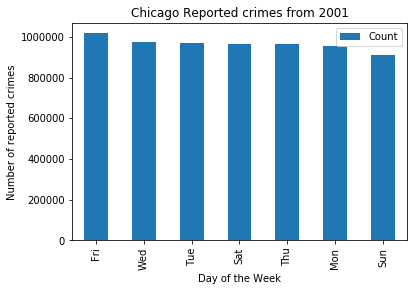

In [0]:
countplot.sort_values('Count', ascending=False).plot(kind="bar", x='Day of week', y="Count")
plt.xlabel("Day of the Week")
plt.ylabel("Number of reported crimes")
plt.title("Chicago Reported crimes from 2001")
plt.show()

#RDD - Resilient Distributed Dataset

In [0]:
psrdd = sc.textFile('police_station.csv')
psrdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [0]:
ps_header = psrdd.first()

In [0]:
ps_rest = psrdd.filter(lambda line: line != ps_header)
ps_rest.first()

'1,Central,1718 S State St,Chicago,IL,60616,http://home.chicagopolice.org/community/districts/1st-district-central/,312-745-4290,312-745-3694,312-745-3693,1176569.052,1891771.704,41.85837259,-87.62735617,"(41.8583725929, -87.627356171)"'

# Find number of polics stations using RDD

In [0]:
ps_rest.map(lambda line: line.split(",")).count()

24

## Display the District ID, District Name, Address and ZIP code.

In [0]:
ps_rest.filter(lambda line: line.split(",")[0]=='7').map(lambda line: (line.split(",")[0], line.split(",")[1], line.split(",")[2], line.split(",")[5])).collect()

[('7', 'Englewood', '1438 W 63rd St', '60636')]

## Police stations 10 and 11 are geographically close to each other. Display the district ID, district name, address and zipcode

In [0]:
ps_rest.filter(lambda line: line.split(",")[0] in ['10', '11']).map(lambda line: (line.split(",")[1], line.split(",")[2], line.split(",")[5])).collect()

[('Harrison', '3151 W Harrison St', '60612'),
 ('Ogden', '3315 W Ogden Ave', '60623')]